In [1]:
## Import the required libraries
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_coupling_map
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Some support functions to calculate the entanglement matrix.

def string2dict(q, len):
    st = ''
    for i in range(0,q+1):
        if i == 0:
            st += '1'
        else:
            st += '0'
    for i in range(0,len-q):
        st = '0'+st
    return st

def string2dict_two(q1 ,q2, len):
    st = ''
    for i in range(0, len):
        if i == q1 or i == q2:
            st = '1' + st
        else:
            st = '0' + st
    return st

def string2dict_zero(len):
    st = ''
    for i in range(0, len):
        st = '0' + st
    return st

In [3]:
# Function to calculate the entanglement matrix.

def general_entanglement(qc, qubit_m1, qubit_m2, shots):

    ent = 0

    qc_aux = qc.copy()

    qc_aux.measure([qubit_m1,qubit_m2],[qubit_m1,qubit_m2])
    Simulation = Aer.get_backend('qasm_simulator')
    Quantum_Transpiler = transpile(qc_aux,Simulation, coupling_map=[[0,1],[1,2],[2,3],[3,4],[4,5]])
    Quantum_Obj = assemble(Quantum_Transpiler, shots=shots)
    Result = Simulation.run(Quantum_Obj).result()

    values_dict = Result.get_counts()

    value_00 = string2dict_zero(qc_aux.num_qubits)
    value_01 = string2dict(qubit_m1, qc_aux.num_qubits-1)
    value_10 = string2dict(qubit_m2, qc_aux.num_qubits-1)
    value_11 = string2dict_two(qubit_m1, qubit_m2, qc_aux.num_qubits)

    values_dict.setdefault(value_00, 0)
    values_dict.setdefault(value_01, 0)
    values_dict.setdefault(value_10, 0)
    values_dict.setdefault(value_11, 0)

    v_00 = np.sqrt(values_dict[value_00]/shots)
    v_01 = np.sqrt(values_dict[value_01]/shots)
    v_10 = np.sqrt(values_dict[value_10]/shots)
    v_11 = np.sqrt(values_dict[value_11]/shots)

    ent = 2*np.abs(v_11*v_00-v_01*v_10)

    return ent

In [4]:
# Plot the entanglement matrix.

def ent_matrix(qc, shots):
    matrix = []

    for i in range(0, qc.num_qubits):
        for j in range(0, qc.num_qubits):
            if i == j:
                matrix.append(1)
            else:
                matrix.append(general_entanglement(qc,i,j, shots))

    new_matrix = np.reshape(matrix, (qc.num_qubits, qc.num_qubits))

    return new_matrix

In [5]:
# Support function that calculated the error between the probability distributions

def error(real_dict, test_dict, shots):
    err = 0

    real_list = list(real_dict.keys())
    test_list = list(test_dict.keys())

    for i in range(0, len(real_list)):

        test_dict.setdefault(real_list[i], 0)
        real_dict.setdefault(test_list[i], 0)
    
    real_list = list(real_dict.keys())
    test_list = list(test_dict.keys())

    for k in range(0, len(real_list)):
        
        err += np.abs(test_dict[real_list[k]]-real_dict[real_list[k]])
    
    return err/shots

C:\Users\bionano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


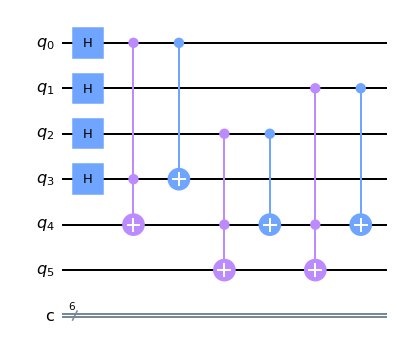

In [6]:
## Circuit definition just a simple one.
## For more information about this circuit, this is the Quantum Full Adder (QFA) for a two qubit system.
## The perfect case.
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Collect2qBlocks, ConsolidateBlocks


qc = QuantumCircuit(6,6)

qc.h([0,1,2,3])
qc.ccx(0,3,4)
qc.cx(0,3)
qc.ccx(2,4,5)
qc.cx(2,4)
qc.ccx(1,4,5)
qc.cx(1,4)

qc.draw('mpl')


C:\Users\bionano\AppData\Local\Temp\ipykernel_2988\55769324.py:13: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  Result = Simulation.run(Quantum_Obj).result()


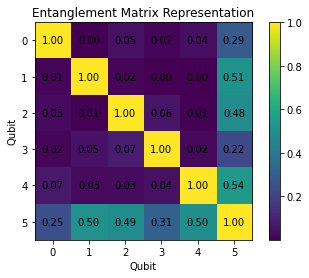

In [7]:
# Calcualte the entanglement matrix for the previous circuit.

fig, ax = plt.subplots()

matrix = ent_matrix(qc, 1000)
im = ax.imshow(matrix)
ax.set_title("Entanglement Matrix Representation")
ax.set_xlabel("Qubit")
ax.set_ylabel("Qubit")
fig.colorbar(im)

for (j,i),label in np.ndenumerate(matrix):
    plt.text(i,j,"%.2f" % label,ha='center',va='center')
    #plt.text(i,j,label,ha='center',va='center')

plt.show()